In [ ]:
import json
import os
from argparse import ArgumentParser, Namespace
from pathlib import Path

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

import torch
import clip

from p1 import read_img, read_text, compute_sim, get_feature

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ywkqcaua because the default path (/home/guest/r11922a05/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
/home/guest/r11922a05/anaconda3/envs/dlcv-hw3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
class P1Args:
    def __init__(self):
        self.data_dir = "./hw3_data/p1_data"
        self.pic_dir = "./hw3_data/p1_data/val"
        self.data_dir = "./hw3_data/p1_data"
        self.mode = "val"
        self.prompt = 1
        self.n_top = 5
        self.n_chunk = 100
        self.model = "ViT-B/16"

In [ ]:
#device = "mps"
device = "cuda" if torch.cuda.is_available() else "cpu"
args = P1Args()

with open(args.data_dir + "/id2label.json") as json_file:
    id2label = json.load(json_file)

In [ ]:
val_pics = sorted(os.listdir(args.pic_dir))
rand_idx = np.random.randint(0,len(val_pics),(3,))
rand_pics = []
correct_labels = []
for idx in rand_idx:
    pic = val_pics[idx]
    rand_pics.append(pic)
    correct_labels.append(pic.split("_")[0])

In [ ]:
model, preprocess = clip.load(args.model, device)
imgs, imgs_original = read_img(rand_pics, preprocess, args) # (num_img, c, h, w)
imgs = imgs.to(device)
texts = read_text(args.prompt, id2label).to(device) # (num_class, 77)
values, index = compute_sim(model, imgs, texts, args.n_top)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

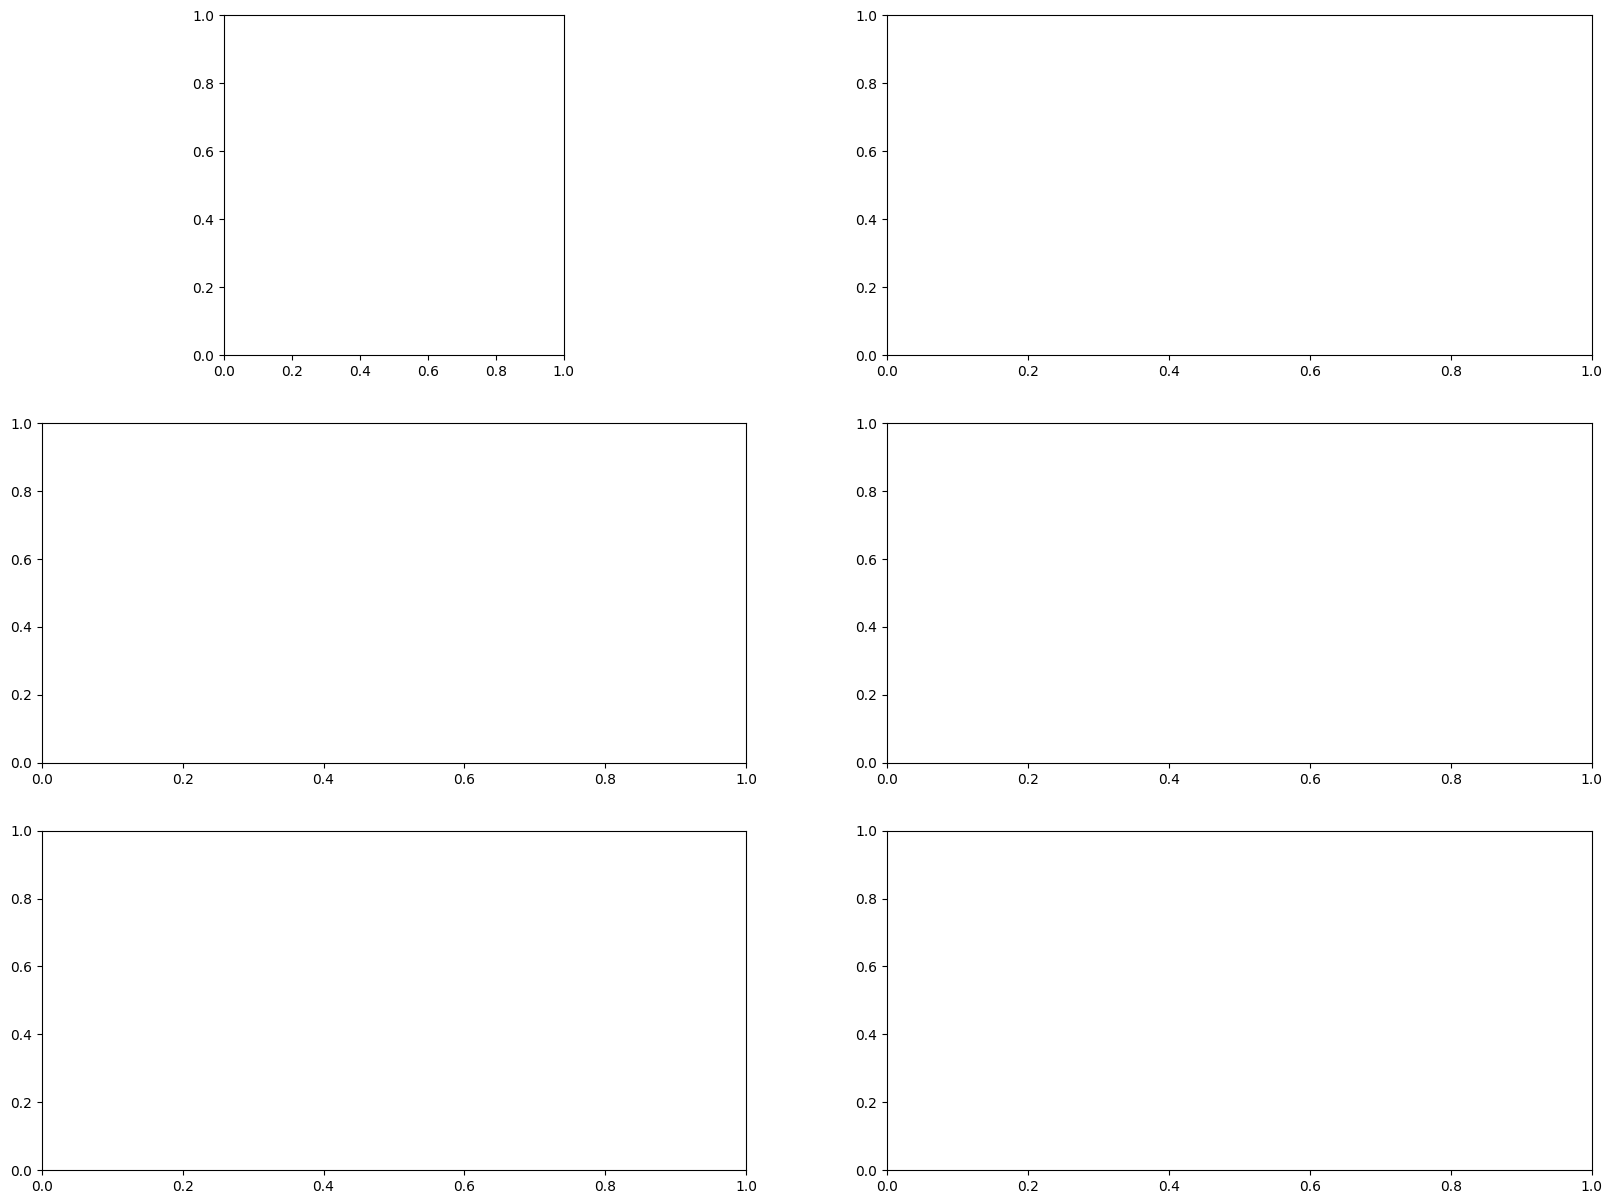

In [7]:
fig, ax = plt.subplots(3,2)
fig.set_size_inches(20, 15)

for i, idx in enumerate(rand_idx):
    ax[i,0].imshow(imgs[i].permute(1, 2, 0))
    ax[i,0].set_title(f'correct label: {id2label[str(correct_labels[i])]}')
    width = 0.75 # the width of the bars
    x = [f'a photo of a {id2label[str(k)]}' for k in index[i]]
    y = list(np.round(100*values[i], 2))
    ax[i,1].barh(x[::-1], y[::-1], width, color=['blue' , 'green', 'yellow', 'orange', 'red'], align='center')
    ax[i,1].set_title(f'correct probability: {np.round(y[0].item(), 2)} %')
    ax[i,1].set_xlim(0,100)
    #ax.set_yticklabels(x, minor=False)
    plt.margins(0,0.05)
    #plt.title(f'a photo of a {id2label[str(correct_labels[i])]}')
    plt.ylabel('classes')

In [ ]:

val_imgs_path = sorted(os.listdir(args.pic_dir))


imgs, imgs_original = read_img(val_imgs_path, preprocess, args) # (num_img, c, h, w)
imgs = imgs.to(device)
texts = read_text(args.prompt, id2label).to(device) # (num_class, 77)

num_rand = 3
idx = torch.randint(0, imgs.size()[0], (num_rand, ))
imgs = imgs[idx]

model.eval()

values, index = compute_sim(model, imgs, texts, args.n_top)

TypeError: 'numpy.int64' object is not iterable

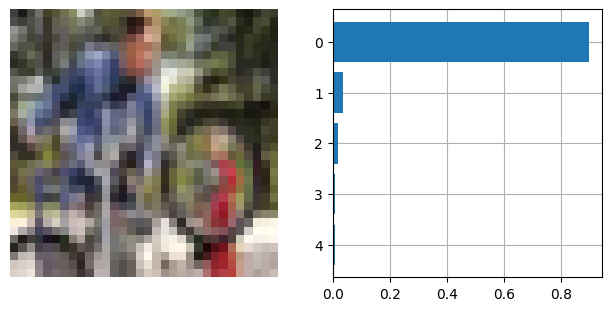

In [ ]:
plt.figure(figsize=(16, 16))

for i, image in enumerate(imgs_original):
    plt.subplot(4, 4, 2 * i + 1)
    plt.imshow(image)
    plt.axis("off")

    plt.subplot(4, 4, 2 * i + 2)
    y = np.arange(values.shape[-1])
    plt.grid()
    plt.barh(y, values[i])
    plt.gca().invert_yaxis()
    plt.gca().set_axisbelow(True)
    plt.yticks(y, [id2label[idx] for idx in index[i]])
    plt.xlabel("probability")

plt.subplots_adjust(wspace=0.5)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/Users/martin/miniconda3/envs/dlcv-hw3/lib/python3.8/site-packages/numpy/lib/stride_tricks.py:538: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/Users/martin/miniconda3/envs/dlcv-hw3/lib/python3.8/site-packages/numpy/lib/stride_tricks.py:538: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depr

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (3,) and arg 3 with shape (5,).

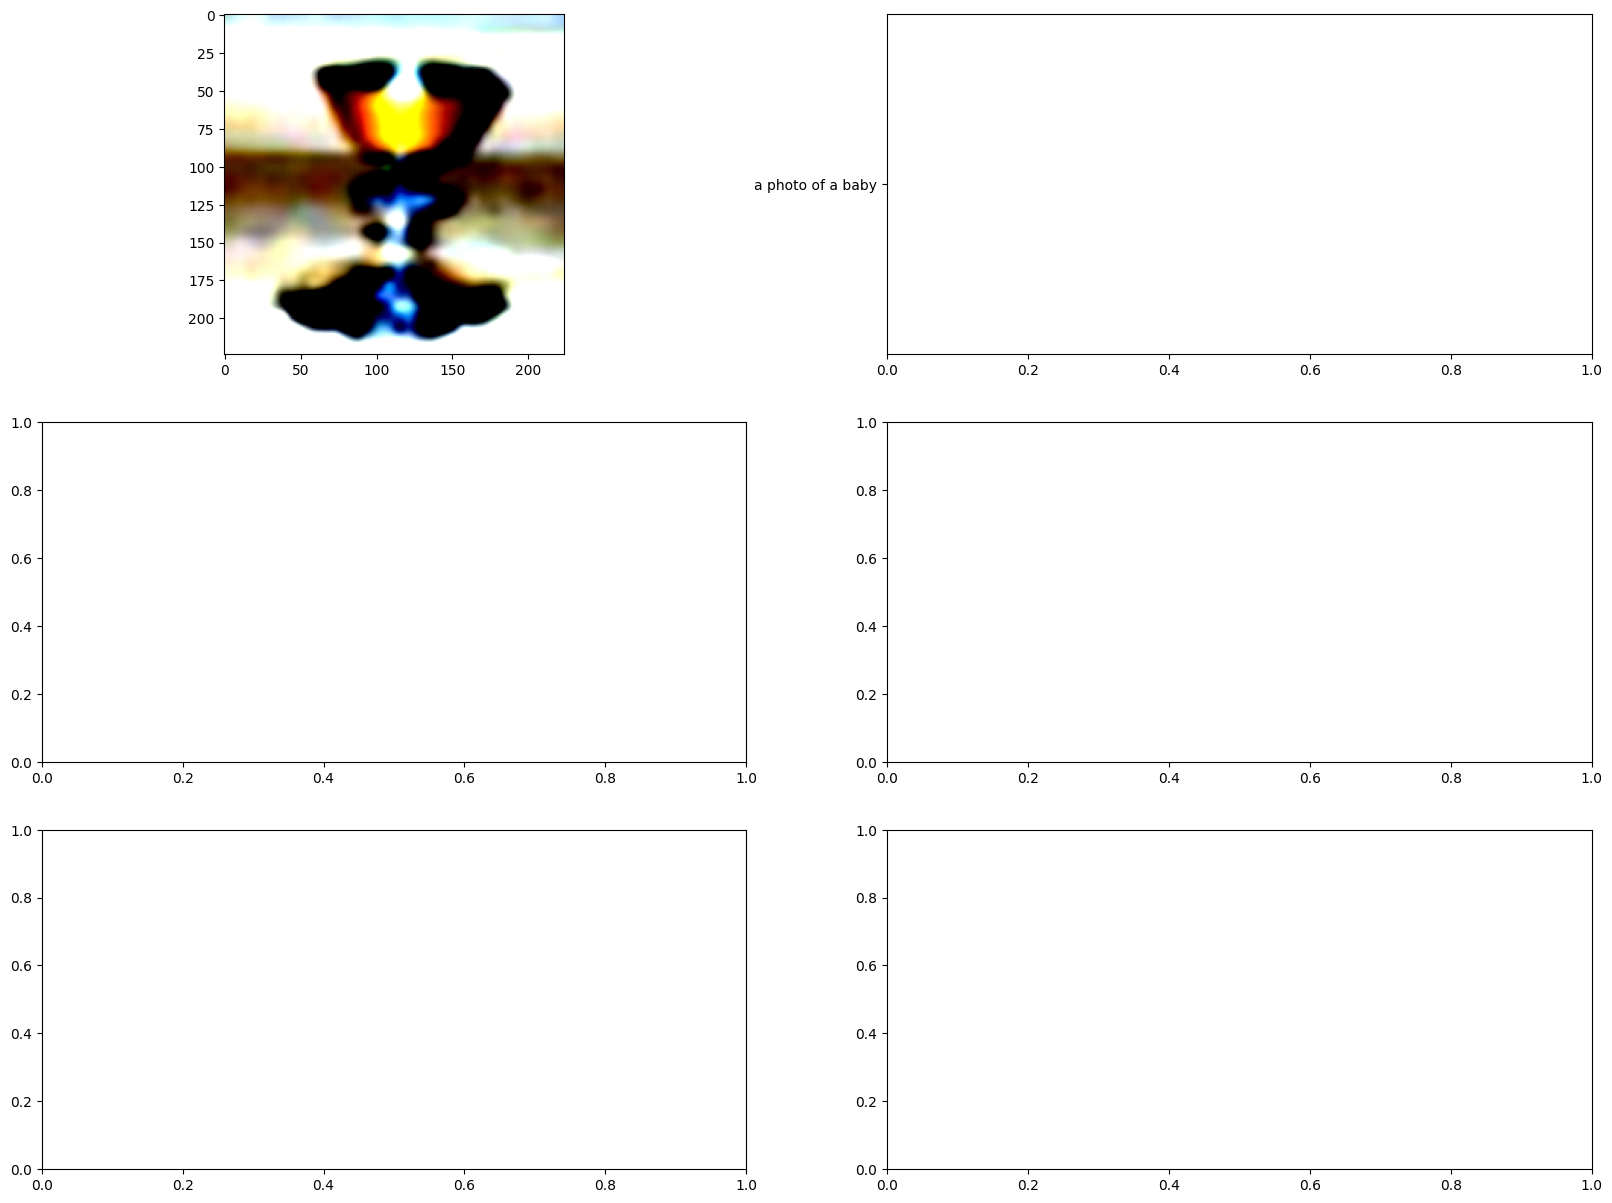

In [ ]:
fig, ax = plt.subplots(3,2)
fig.set_size_inches(20, 15)
for i, idx in enumerate(index):
    
    ax[i,0].imshow(imgs[i].permute(1, 2, 0))
    #ax[i,0].set_title(f'correct label: {id2label[str(label)]}')
    width = 0.75 # the width of the bars
    x = [f'a photo of a {id2label[str(k)]}' for k in index[i]]
    y = list(np.round(100*values, 2))
 
    ax[i,1].barh(x[::-1], y[::-1], width, color=['blue' , 'green', 'yellow', 'orange', 'red'], align='center')
    ax[i,1].set_title(f'correct probability: {y[0]} %')
    ax[i,1].set_xlim(0,100)
    #ax.set_yticklabels(x, minor=False)
    plt.margins(0,0.05)
    #plt.title(f'a photo of a {id2label[str(label)]}')
    plt.ylabel('classes')
    
plt.savefig('./outputs/problem1.png')    
plt.show()

In [ ]:
# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/16', device)

model.eval()
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in list(id2label.values())]).to(device)
correct = 0


rand_idx = torch.randint(0,len(val_set),(3,))
num=0
#fig = plt.figure(figsize=(10,20))

for i, idx in enumerate(rand_idx):
    
    image, label = val_set[idx]
    image_input = preprocess(image).unsqueeze(0).to(device)
    # Calculate features
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_inputs)

    # Pick the top 5 most similar labels for the image
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    values, indices = similarity[0].topk(5)
    
    ax[i,0].imshow(image)
    ax[i,0].set_title(f'correct label: {id2label[str(label)]}')
    width = 0.75 # the width of the bars
    x = [f'a photo of a {id2label[str(k)]}' for k in indices.cpu().numpy()]
    y = list(np.round(100*values.cpu().numpy(), 2))
 
    ax[i,1].barh(x[::-1], y[::-1], width, color=['blue' , 'green', 'yellow', 'orange', 'red'], align='center')
    ax[i,1].set_title(f'correct probability: {y[0]} %')
    ax[i,1].set_xlim(0,100)
    #ax.set_yticklabels(x, minor=False)
    plt.margins(0,0.05)
    plt.title(f'a photo of a {id2label[str(label)]}')
    plt.ylabel('classes')
    num+=1

# P3 - 1

In [7]:
import json
from PIL import Image
from tokenizers import Tokenizer
import cv2

import matplotlib.pyplot as plt
import os
import numpy as np

from torchvision.transforms import Compose, ToTensor, Lambda, ToPILImage, CenterCrop, Resize
import torch

from p2_evaluate import CLIPScore, readJSON
from p2.model import make_model
from p2_test import create_caption_and_mask, Args

In [12]:
use_gpu = torch.cuda.is_available()
device = torch.device("cuda" if use_gpu else "cpu")

In [9]:
model_path = 'cache/p2/1124/1669221581/ep_7_loss_3.3453'
tokenizer_path = 'p2/caption_tokenizer.json'

transform = Compose([
        Resize((224, 224)),
        ToTensor()
    ])

tokenizer = Tokenizer.from_file(tokenizer_path)
f = open(tokenizer_path)
token_json = json.load(f)
vocab_size = len(token_json['model']['vocab'])

In [10]:
args = Args()
model = make_model(args, vocab_size)
ckpt = torch.load(model_path)
model.load_state_dict(ckpt['model'])
model = model.to(device)

RuntimeError: CUDA out of memory. Tried to allocate 12.00 MiB (GPU 0; 23.70 GiB total capacity; 4.43 GiB already allocated; 6.56 MiB free; 4.43 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [5]:
attn_maps = {}
def get_maps(name):
    def hook(model, input, output):
        attn_maps[name] = output[1].clone().squeeze(0).cpu().numpy()
    return hook

@torch.no_grad()
def predict(model, img, caption, cap_mask, args):
    model.eval()
    caption_len = 0
    for i in range(args.max_len - 1):
        predictions = model(img, caption, cap_mask)
        predictions = predictions[:, i, :]
        predicted_id = torch.argmax(predictions, axis=-1)

        caption_len += 1
        # [EOS] = 3
        if predicted_id[0] == 3:
            return caption, caption_len
        caption[:, i+1] = predicted_id[0]
        cap_mask[:, i+1] = False
       
    
    return caption, caption_len

In [57]:
model.eval()

img_root = './hw3_data/p3_data/images/'
img_names = os.listdir(img_root)

img2attn_map = {}

for img_name in img_names:
    data = {}
    image_path = os.path.join(img_root, img_name)
    img = Image.open(image_path).convert("RGB") 
    img_trans = transform(img).unsqueeze(0)

    caption, cap_mask = create_caption_and_mask(
        start_token=2, max_length=64
    )
    img_trans, caption, cap_mask = img_trans.to(device), caption.to(device), cap_mask.to(device)

    model.decoder.decoder.layers[-1].multihead_attn.register_forward_hook(get_maps('att'))
    pred_ids, caption_len = predict(model, img_trans, caption, cap_mask, args)
    pred_ids = pred_ids.cpu().numpy().tolist()

    pred = tokenizer.decode(pred_ids[0], skip_special_tokens=True)
    pred = pred.capitalize()

    data['caption_len'] = caption_len
    data['caption'] = pred
    data['attn_map'] = attn_maps['att']
    img2attn_map[img_name] = data

    print(img_name, pred, caption_len)

umbrella.jpg A woman in a black shirt and tie walking down a street with a large black and white photo . 21
sheep.jpg A herd of sheep standing on top of a grass field . 13
ski.jpg A man on a snow board on a snow covered slope . 13
bike.jpg A stop sign is parked on the side of a road . 13
girl.jpg A woman in a red shirt is holding a hot dog . 13


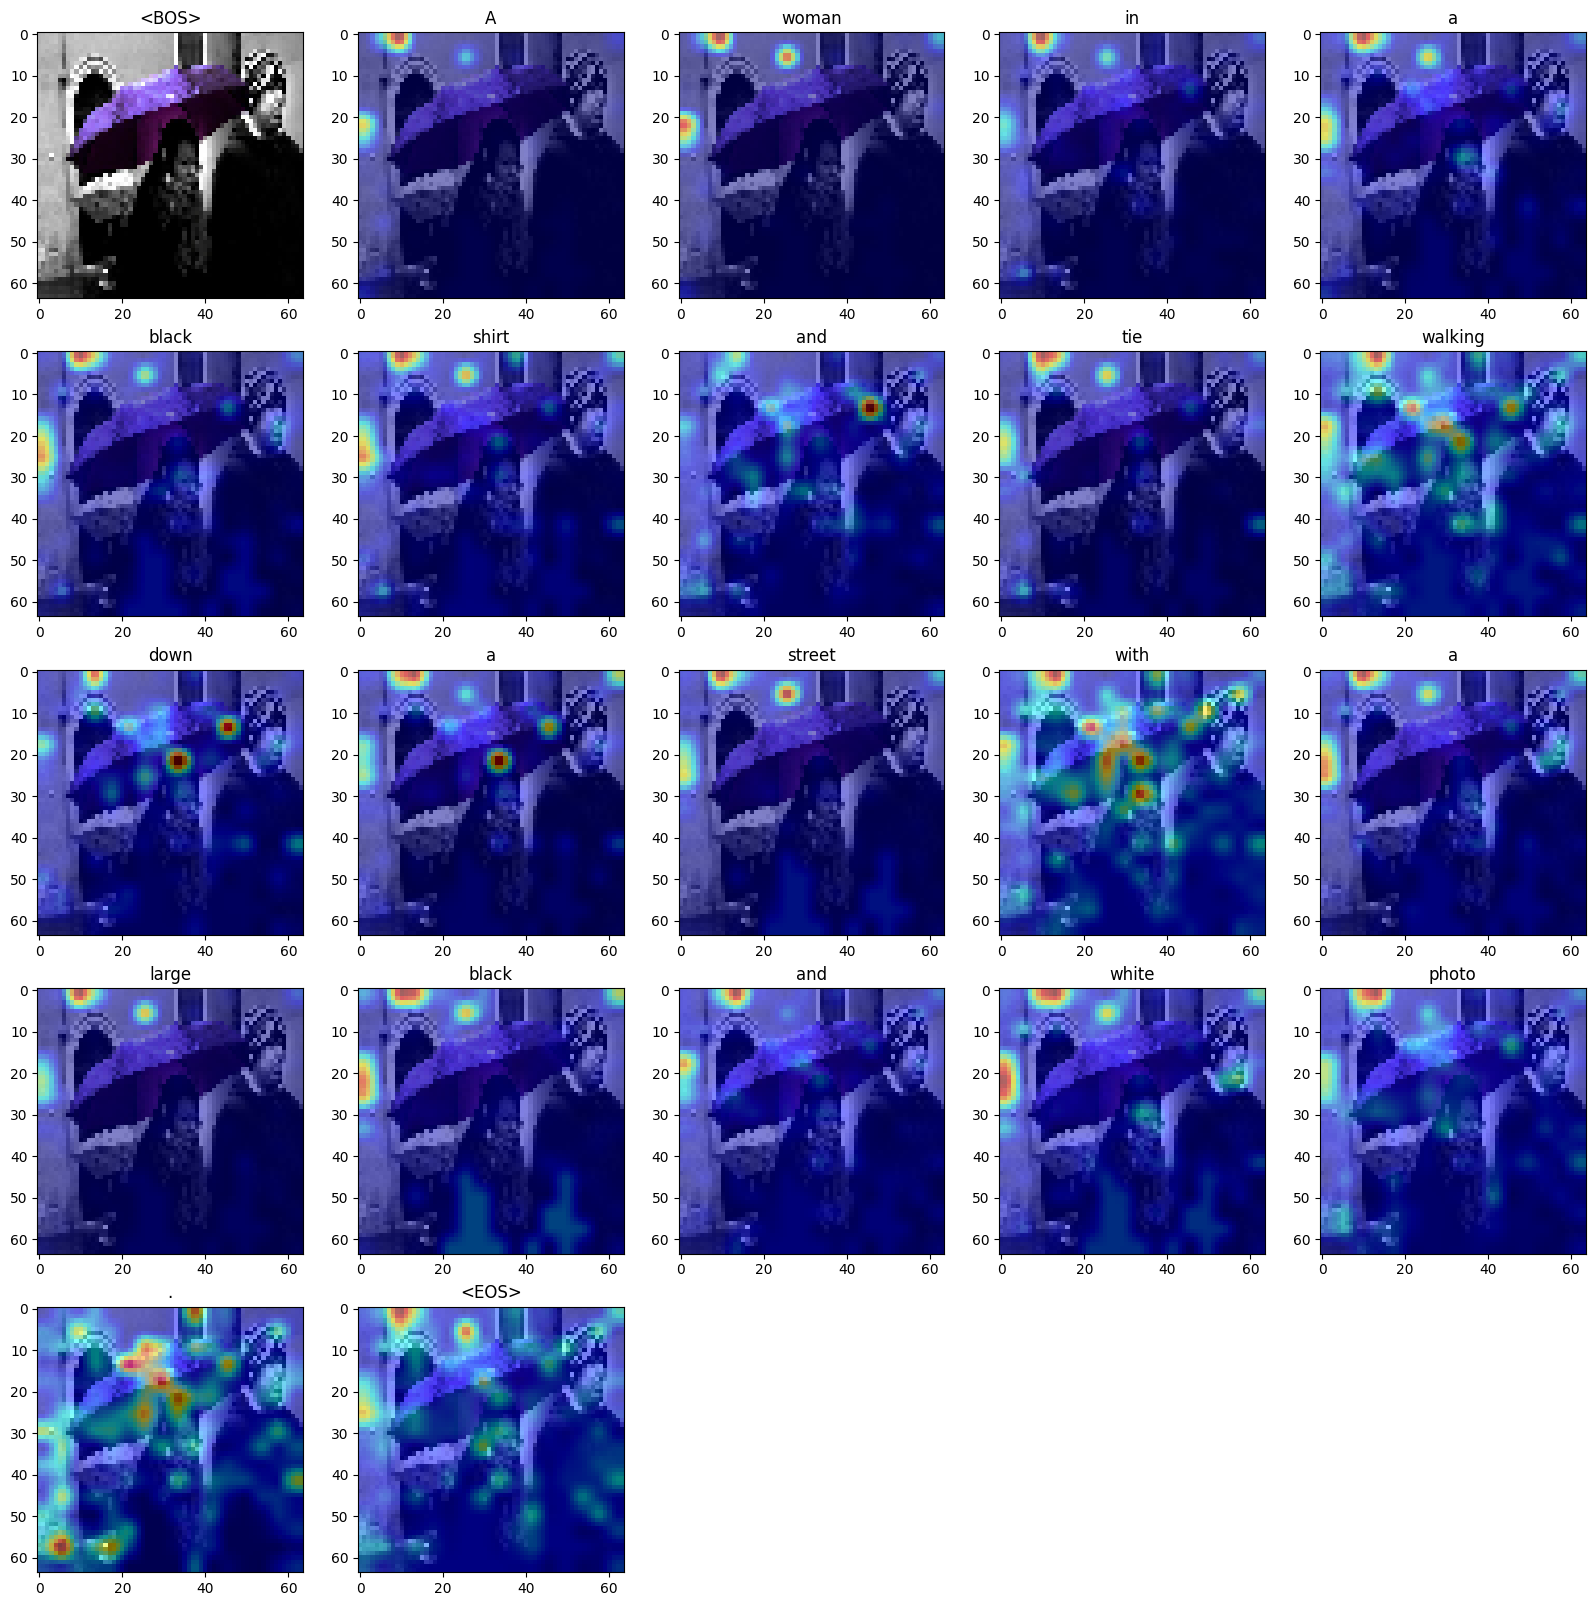

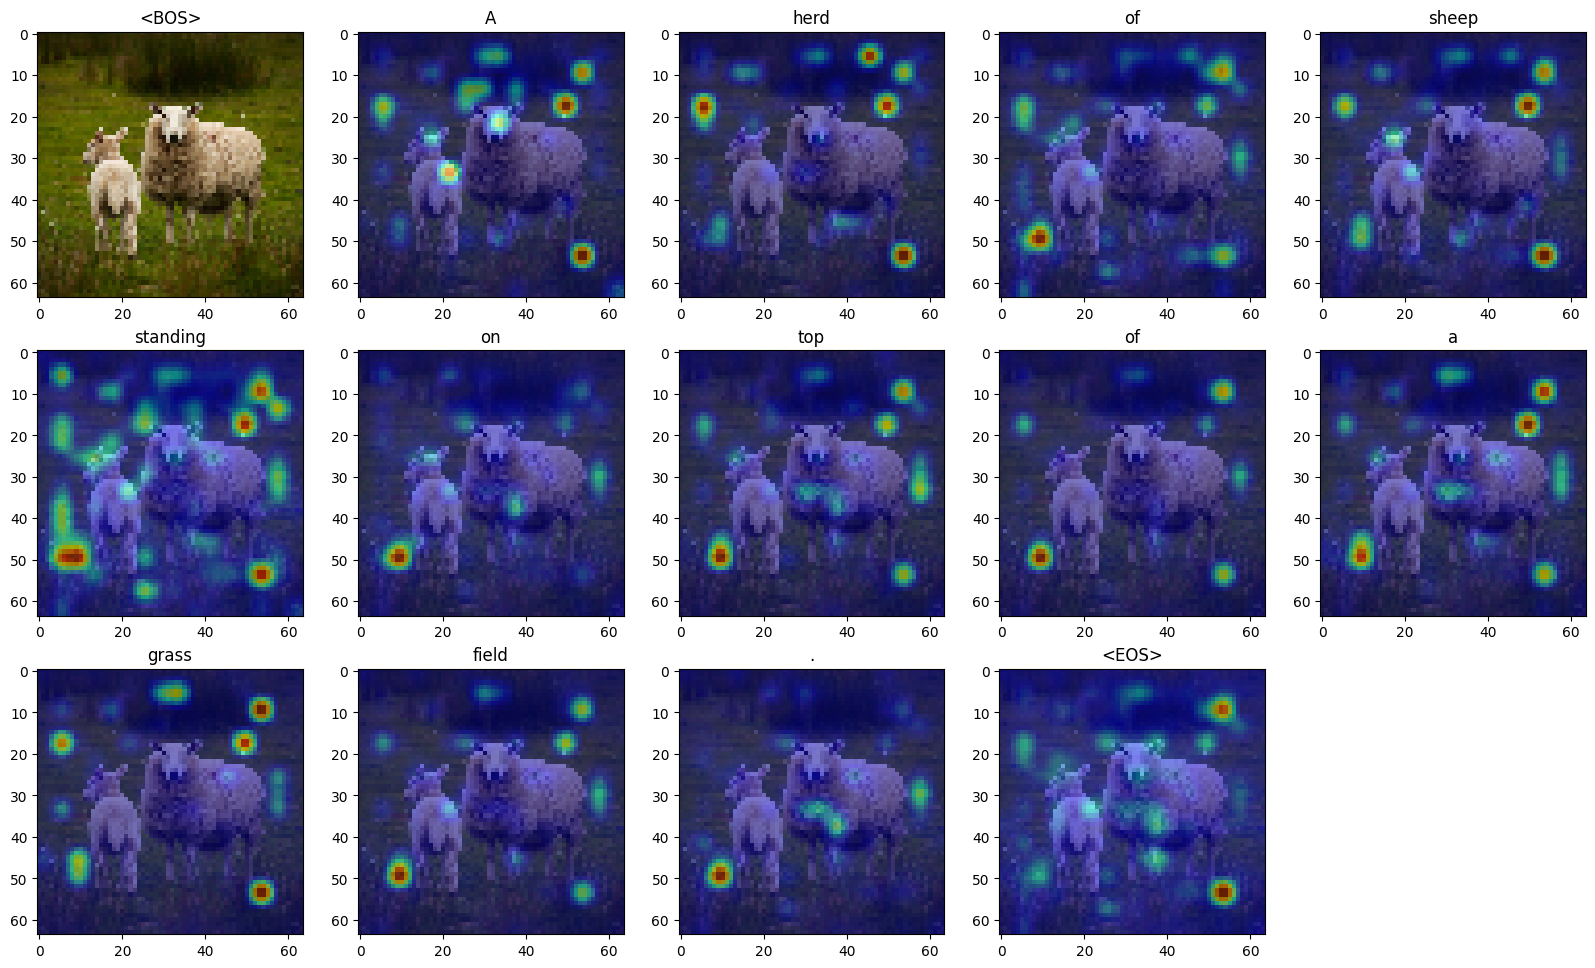

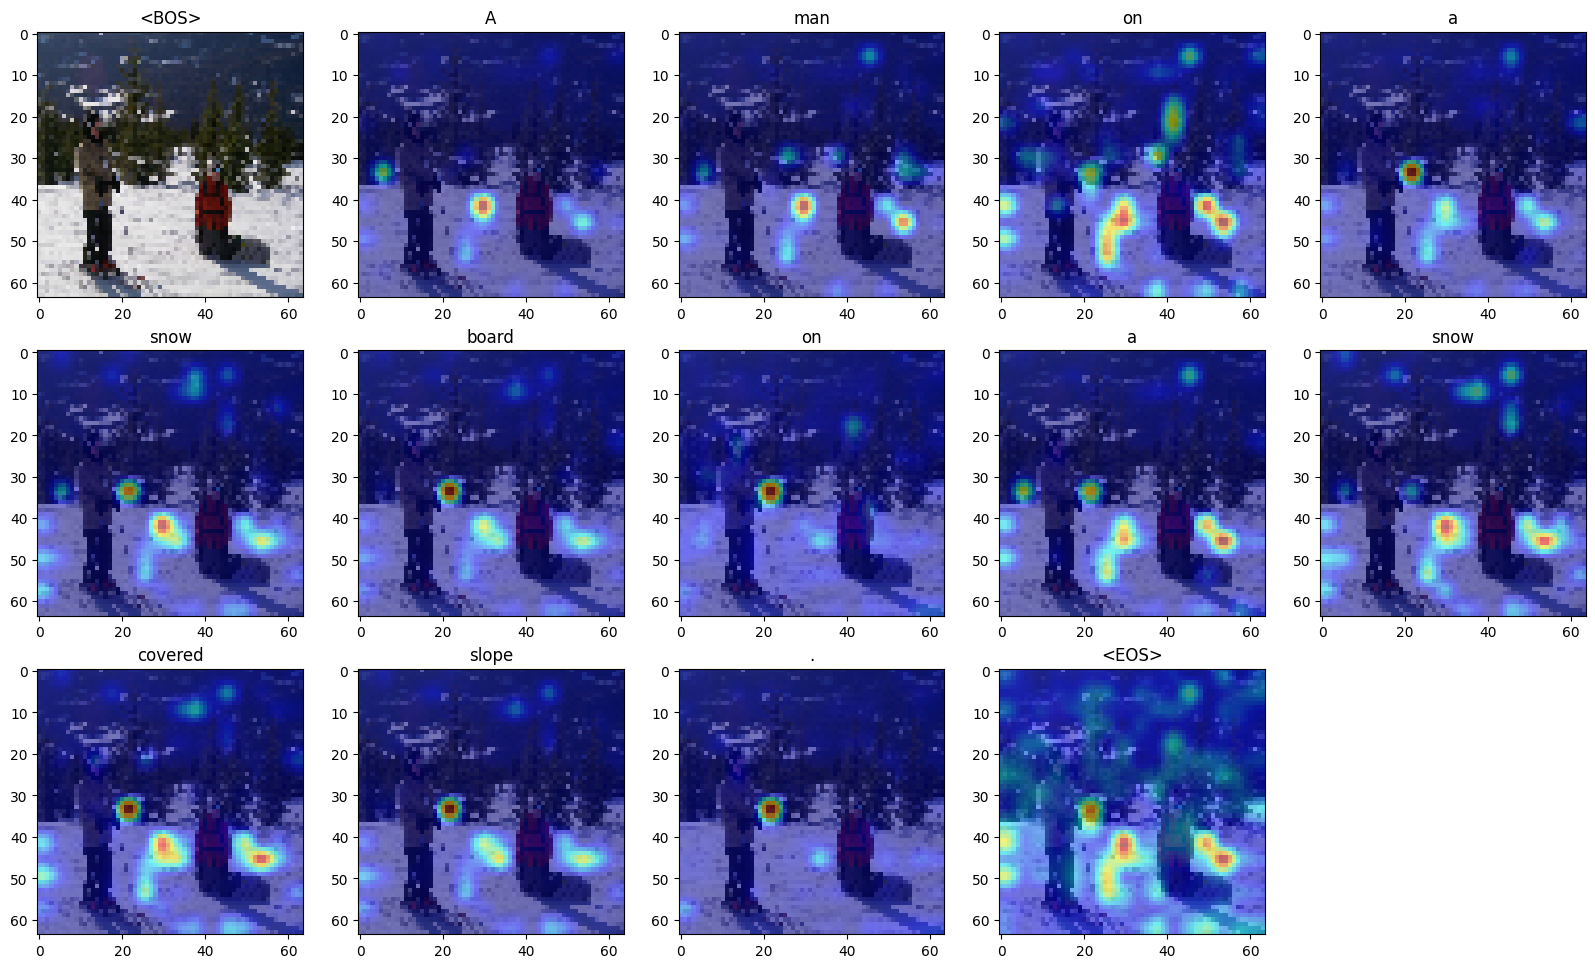

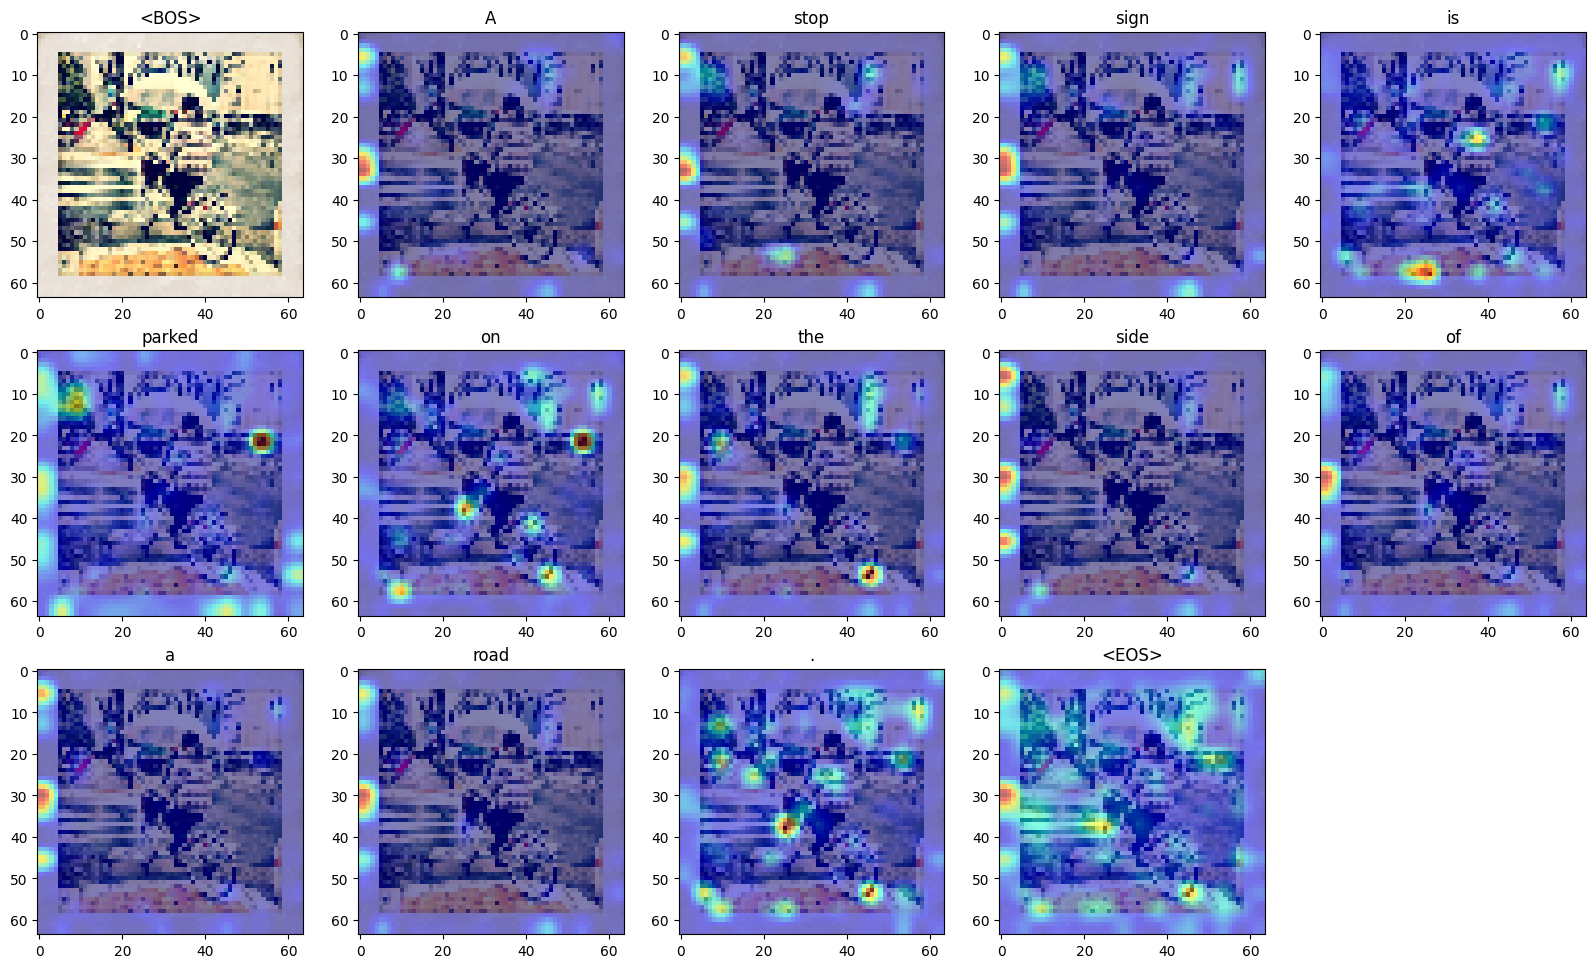

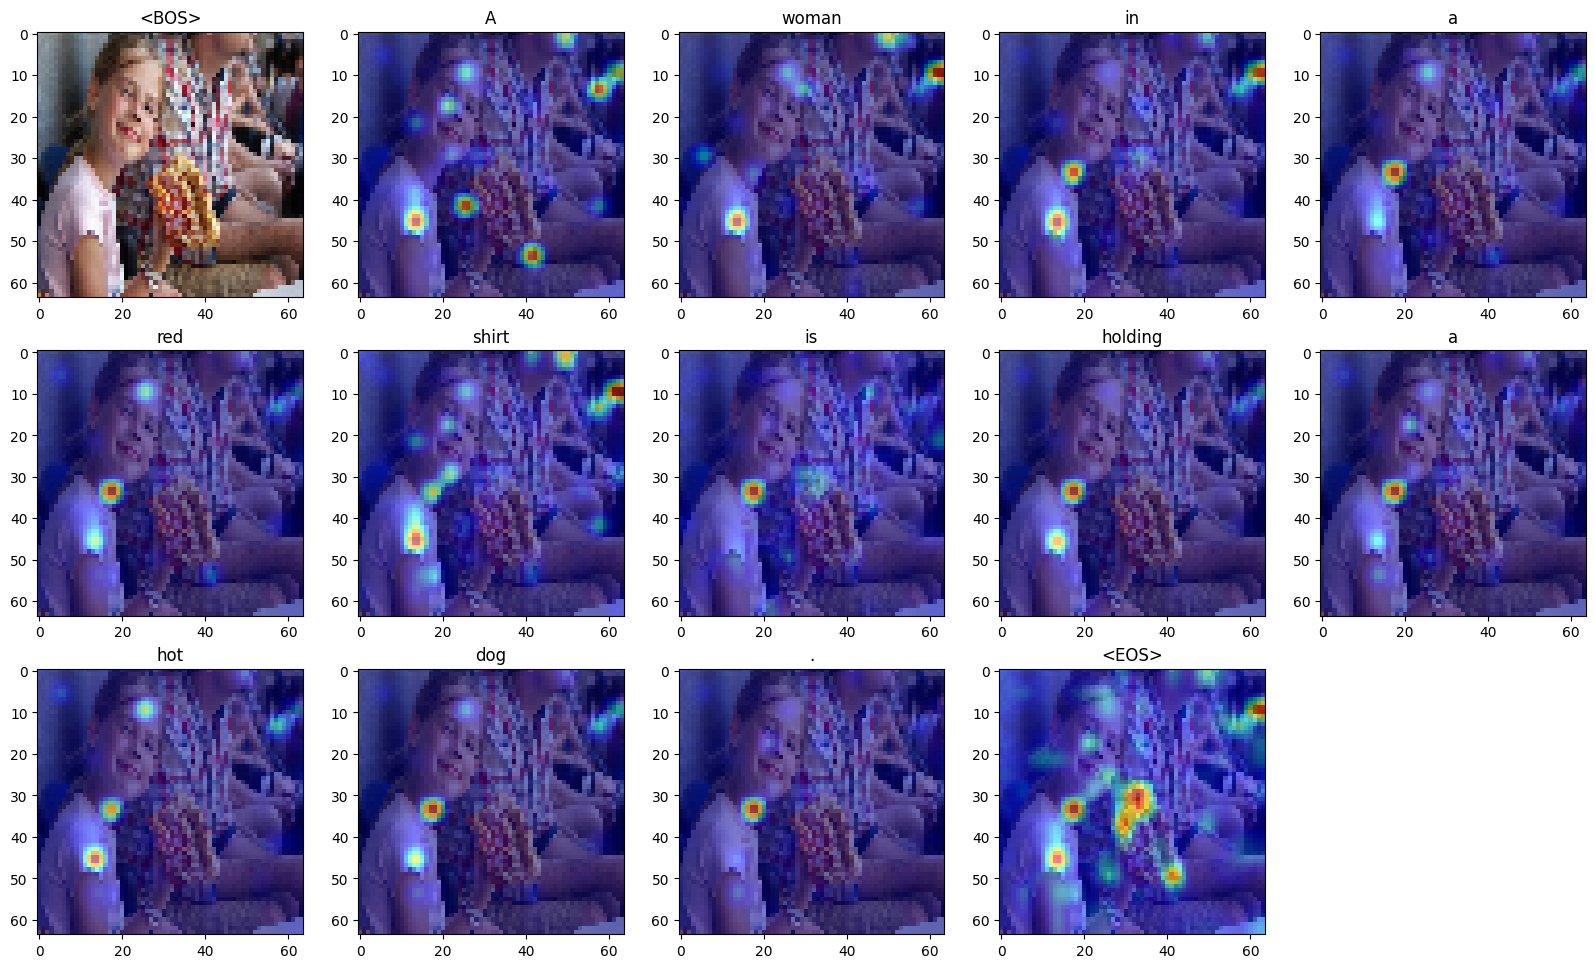

In [78]:
img_root = './hw3_data/p3_data/images/'
for img_name, data in img2attn_map.items():
    img_path = os.path.join(img_root, img_name)
    fig = plt.figure(figsize=(20, 20))

    im = torch.from_numpy(cv2.imread(img_path)).permute(2,0,1)
    img = Resize((64, 64))(im)

    preds = '<BOS> ' + data['caption'] + ' <EOS>'
    preds = preds.split()

    img = img.numpy().transpose(1,2,0)[:,:,::-1]

    ax_3 = 2
    attn_maps = data['attn_map']
    caption_len = data['caption_len']
    #print(attn_maps.shape)
    for cur_w in range(caption_len):
        ax = plt.subplot(5, 5, ax_3)

        #print(attn_maps[cur_w].shape)
        attn = torch.from_numpy(attn_maps[cur_w]).reshape(16, 16).unsqueeze(0)

        attn_map = torch.from_numpy(
            np.vstack([attn, attn, attn])
            )
        attn_map = Resize((64, 64))(attn_map)
        attn_map = attn_map / attn_map.max()
        attn_map = (attn_map * 255).numpy().transpose(1,2,0).astype('uint8')

        # scale the image
        heatmap_img = cv2.applyColorMap(attn_map, cv2.COLORMAP_JET)[:,:,::-1]
        super_imposed_img = cv2.addWeighted(heatmap_img, 0.5, img, 0.5, 0)
        
        if cur_w == 0:
            bx = plt.subplot(5,5,1)
            bx.imshow(img)
            bx.set_title(preds[0])
            ax.imshow(super_imposed_img)
            ax.set_title(preds[1])
        else:
            ax.imshow(super_imposed_img)
            ax.set_title(preds[cur_w+1])
        ax_3 += 1

# P3-2

In [11]:
img_names = sorted(os.listdir(img_root))

In [6]:
clip_score = CLIPScore()
img_root = './hw3_data/p2_data/images/val/'
img_names = sorted(os.listdir(img_root))
img2score = dict()

model.eval()

img2attn_map = {}

for img_name in img_names:
    data = {}
    image_path = os.path.join(img_root, img_name)
    img = Image.open(image_path).convert("RGB") 
    img_trans = transform(img).unsqueeze(0)

    caption, cap_mask = create_caption_and_mask(
        start_token=2, max_length=64
    )
    img_trans, caption, cap_mask = img_trans.to(device), caption.to(device), cap_mask.to(device)

    model.decoder.decoder.layers[-1].multihead_attn.register_forward_hook(get_maps('att'))
    pred_ids, caption_len = predict(model, img_trans, caption, cap_mask, args)
    pred_ids = pred_ids.cpu().numpy().tolist()

    pred = tokenizer.decode(pred_ids[0], skip_special_tokens=True)
    pred = pred.capitalize()

    data['caption_len'] = caption_len
    data['caption'] = pred
    data['attn_map'] = attn_maps['att']
    img2attn_map[img_name] = data
    
    #print(img_name, pred)
    score = clip_score.getCLIPScore(img, pred)
    img2score[img_name] = score

img2score = dict(sorted(img2score.items(), key=lambda item: item[1]))
print(img2score)

KeyboardInterrupt: 

In [15]:
top_img = list(img2score.keys())[0]
last_img = list(img2score.keys())[-1]

In [16]:
top_img, img2score[top_img], last_img, img2score[last_img]

('000000000368.jpg', 0.41778564453125, '000000472295.jpg', 0.7537841796875)

000000000368.jpg
000000472295.jpg


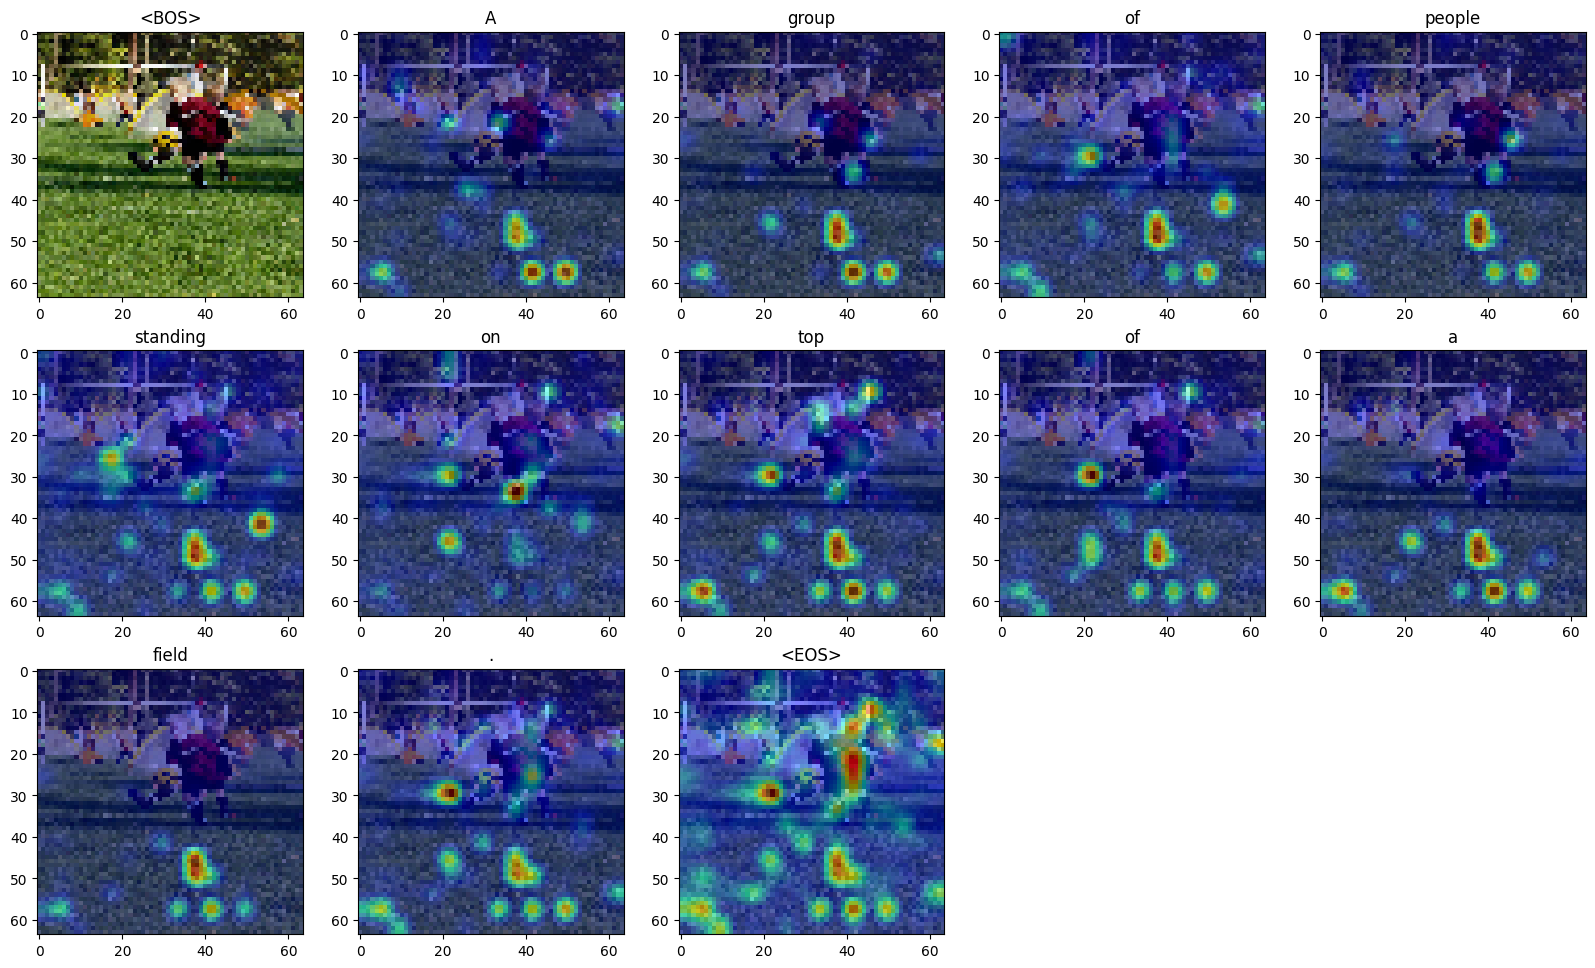

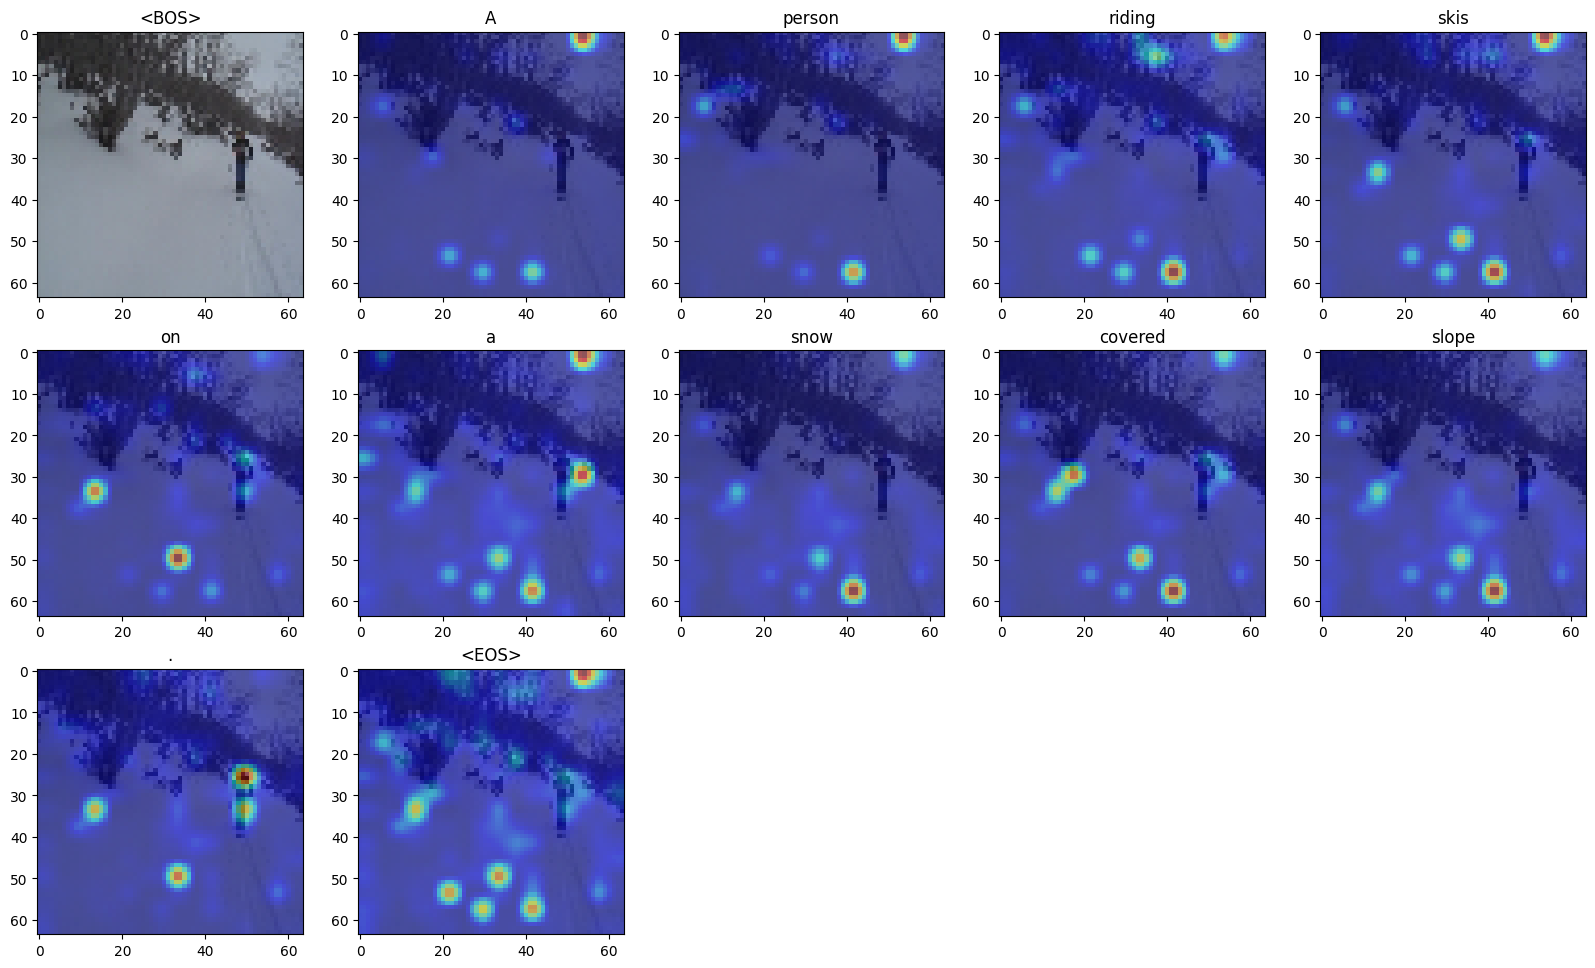

In [17]:
img_root = './hw3_data/p2_data/images/val'
for img_name, data in img2attn_map.items():
    if img_name == top_img or img_name == last_img:
        print(img_name)
        img_path = os.path.join(img_root, img_name)
        fig = plt.figure(figsize=(20, 20))

        im = torch.from_numpy(cv2.imread(img_path)).permute(2,0,1)
        img = Resize((64, 64))(im)

        preds = '<BOS> ' + data['caption'] + ' <EOS>'
        preds = preds.split()

        img = img.numpy().transpose(1,2,0)[:,:,::-1]

        ax_3 = 2
        attn_maps = data['attn_map']
        caption_len = data['caption_len']
        #print(attn_maps.shape)
        for cur_w in range(caption_len):
            ax = plt.subplot(5, 5, ax_3)

            #print(attn_maps[cur_w].shape)
            attn = torch.from_numpy(attn_maps[cur_w]).reshape(16, 16).unsqueeze(0)

            attn_map = torch.from_numpy(
                np.vstack([attn, attn, attn])
                )
            attn_map = Resize((64, 64))(attn_map)
            attn_map = attn_map / attn_map.max()
            attn_map = (attn_map * 255).numpy().transpose(1,2,0).astype('uint8')

            # scale the image
            heatmap_img = cv2.applyColorMap(attn_map, cv2.COLORMAP_JET)[:,:,::-1]
            super_imposed_img = cv2.addWeighted(heatmap_img, 0.5, img, 0.5, 0)
            
            if cur_w == 0:
                bx = plt.subplot(5,5,1)
                bx.imshow(img)
                bx.set_title(preds[0])
                ax.imshow(super_imposed_img)
                ax.set_title(preds[1])
            else:
                ax.imshow(super_imposed_img)
                ax.set_title(preds[cur_w+1])
            ax_3 += 1